# Метрическая классификация. Метод ближайших соседей и его развитие
# Практическая работа

## Цели практической работы
Научиться:
- строить модель методом ближайших соседей на реальных данных;
- правильно определять качество работы модели.


## Что входит в практическую работу


- Загрузить данные и ознакомиться с ними.
- Изучить данные и провести анализ.
- Разделить данные на обучающую и тестовую выборки.
- Реализовать построение модели с помощью  библиотеки Scikit-learn.
- Подобрать оптимальное число ближайших соседей методом leave-one-out.
- Получить качество модели с помощью F-меры и матрицы сопряжённости.

## Что оценивается

1. Выполнение всех этапов работы.
2. Наличие вывода по результатам.
3. Непереобученность модели.
4. Качество модели.


**Как отправить работу на проверку?**

1. Скачайте файл с заданием в материалах, откройте его через Jupyter Notebook и выполните задачу. 
2. Сохраните изменения при помощи опции Save and Checkpoint из вкладки File или кнопки Save and Checkpoint на панели инструментов. 
3. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.




# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите дамп базы в Postgres. 
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности. 


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

1. Изучите состав БД с помощью инструмента отрисовки ERD-диаграмм (Entity Relationship diagram отображает все сущности БД, а также визуализирует связность таблиц). Соберите датасет следующей структуры из данных, имеющихся в базе:

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

2. Постройте модель зависимости TARGET от остальных параметров получившейся таблицы методом ближайших соседей.

3. Получите качество модели с помощью F-меры и матрицы сопряжённости.

Что нужно сделать после сбора таблицы:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

In [2300]:
# считать данные

df = pd.read_csv("bank_data.csv")
df

,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,loan_num_total,loan_num_closed
0,59910150.0,0.0,49.0,2.0,1.0,1.0,2.0,1.0,5000.0,1,1
1,59910230.0,0.0,32.0,2.0,1.0,1.0,3.0,3.0,12000.0,1,1
2,59910525.0,0.0,52.0,2.0,1.0,1.0,4.0,0.0,9000.0,2,1
3,59910803.0,0.0,39.0,2.0,1.0,1.0,1.0,1.0,25000.0,1,1
4,59911781.0,0.0,30.0,2.0,1.0,0.0,0.0,0.0,12000.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
15218,75291424.0,0.0,25.0,2.0,1.0,0.0,1.0,1.0,12000.0,3,2
15219,75291888.0,0.0,51.0,2.0,1.0,1.0,2.0,0.0,10000.0,1,0
15220,75291923.0,0.0,22.0,2.0,1.0,1.0,1.0,1.0,6000.0,1,0
15221,75291960.0,0.0,60.0,1.0,2.0,1.0,2.0,0.0,4500.0,1,0


In [1856]:
# проведите анализ данных, посмотрите на индивидуальные графики
# зависимости целевой функции и отдельной переменной
# создайте дополнительные переменные
# для работы с категориальными данными можно воспользоваться pd.get_dummies
# сделайте предварительные выводы

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   agreement_rk       15223 non-null  float64
 1   target             15223 non-null  float64
 2   age                15223 non-null  float64
 3   socstatus_work_fl  15223 non-null  float64
 4   socstatus_pens_fl  15223 non-null  float64
 5   gender             15223 non-null  float64
 6   child_total        15223 non-null  float64
 7   dependants         15223 non-null  float64
 8   personal_income    15223 non-null  float64
 9   loan_num_total     15223 non-null  int64  
 10  loan_num_closed    15223 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.3 MB


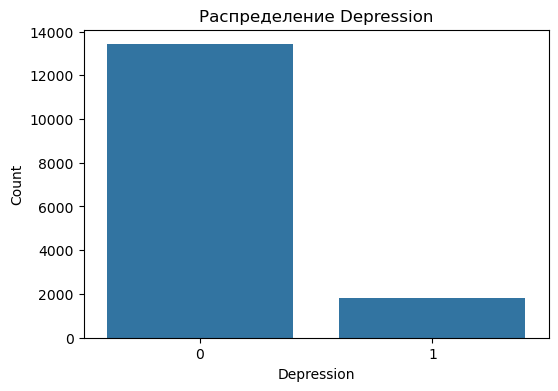

In [428]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Распределение Depression')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

In [433]:
df[df["target"] == 0].shape

(13411, 13)

In [435]:
df[df["target"] == 1].shape

(1812, 13)

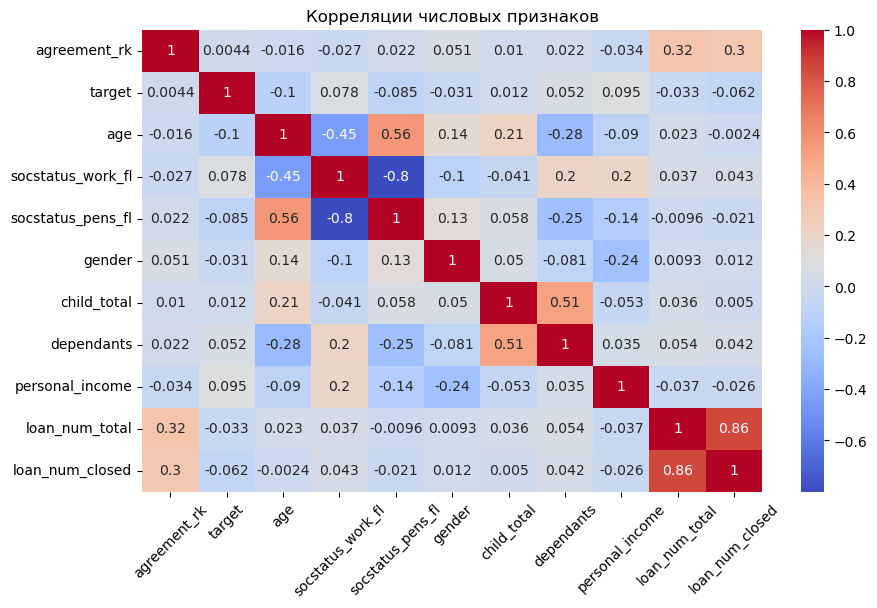

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Корреляции числовых признаков")
plt.xticks(rotation=45)
plt.show()

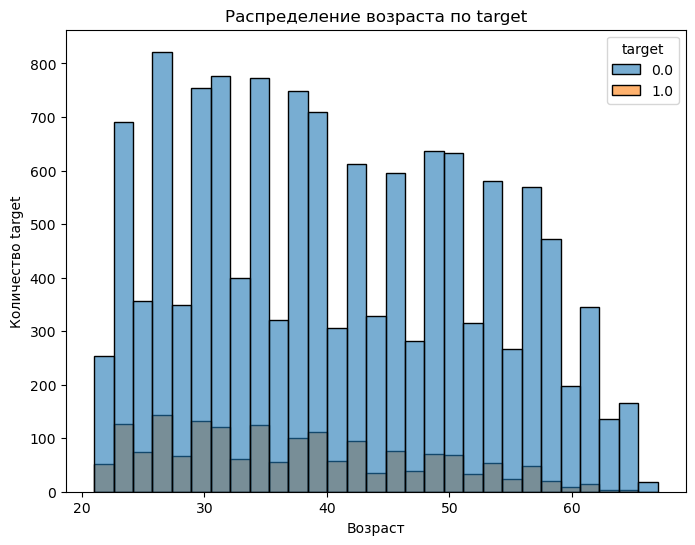

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='age', hue='target', alpha=0.6)
plt.title('Распределение возраста по target')
plt.xlabel('Возраст')
plt.ylabel('Количество target')
plt.show()

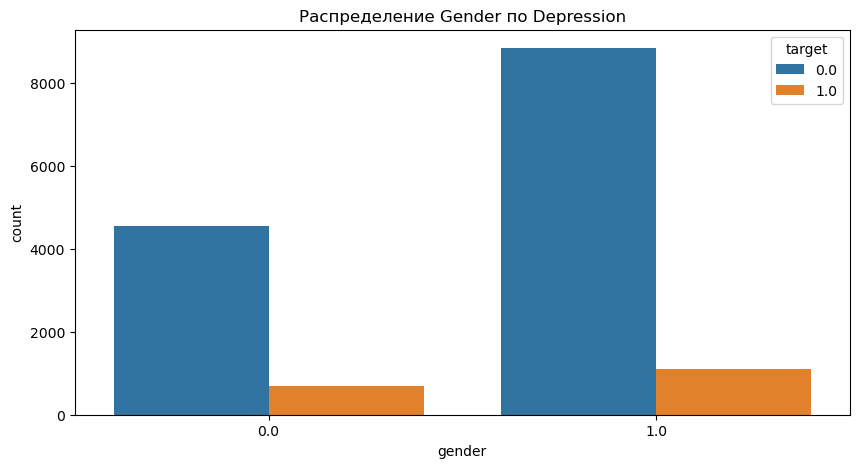

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender', hue='target', data=df)
plt.title('Распределение Gender по target')
plt.show()

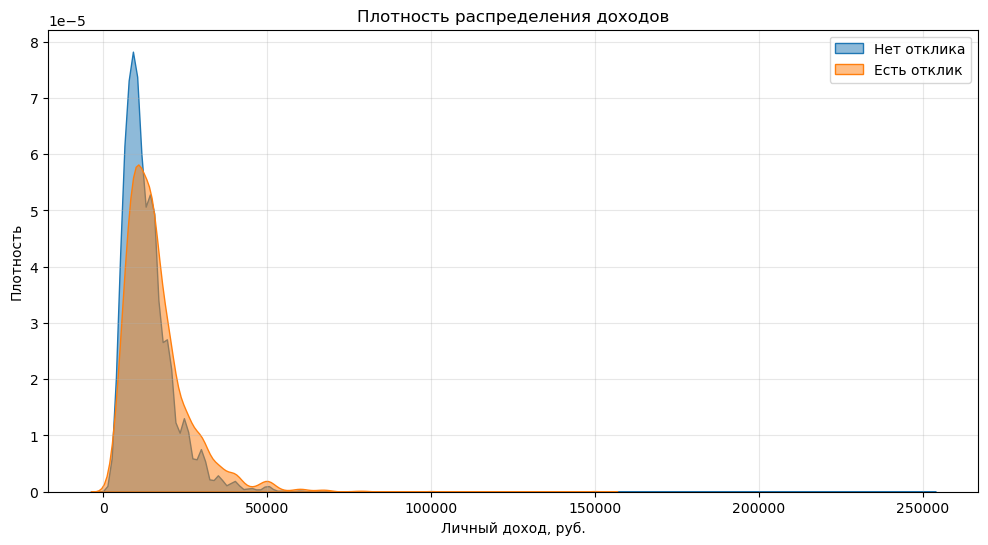

In [41]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['target'] == 0]['personal_income'], 
            label='Нет отклика', fill=True, alpha=0.5)
sns.kdeplot(data=df[df['target'] == 1]['personal_income'], 
            label='Есть отклик', fill=True, alpha=0.5)
plt.title('Плотность распределения доходов')
plt.xlabel('Личный доход, руб.')
plt.ylabel('Плотность')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

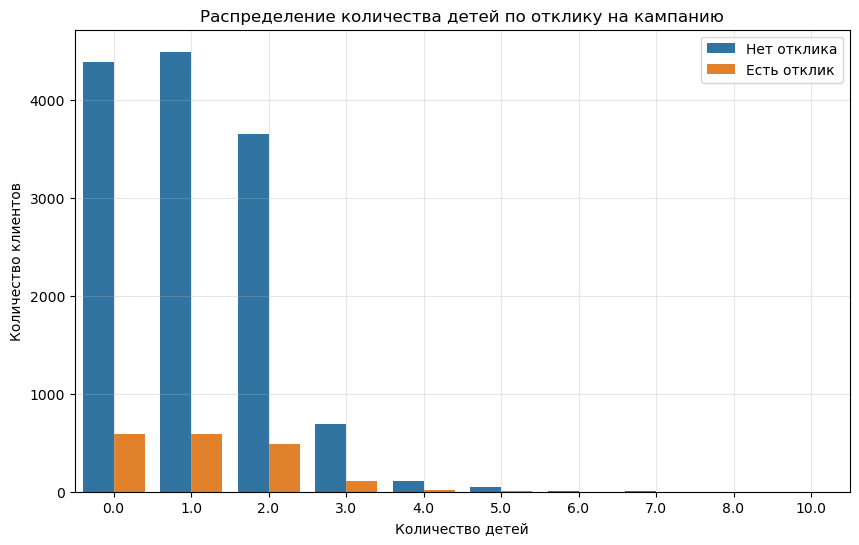

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='child_total', hue='target')
plt.title('Распределение количества детей по отклику на кампанию')
plt.xlabel('Количество детей')
plt.ylabel('Количество клиентов')
plt.legend(['Нет отклика', 'Есть отклик'])
plt.grid(alpha=0.3)
plt.show()

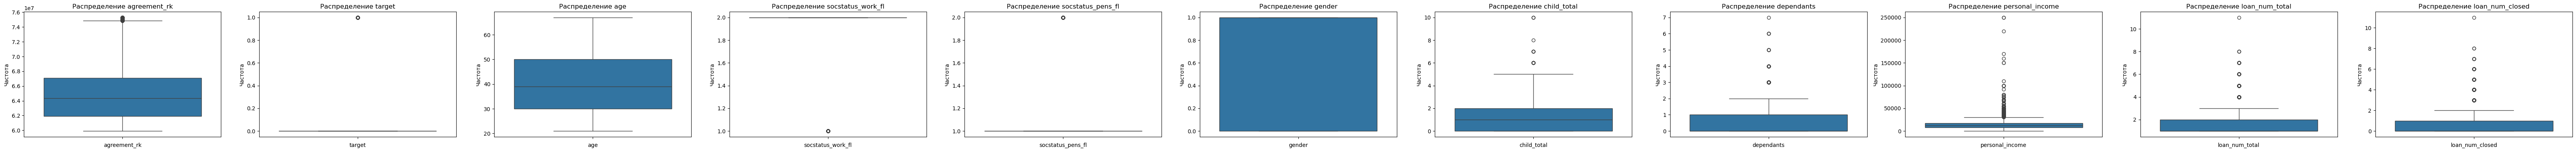

In [53]:
num_cols = df.columns 
fig, axes = plt.subplots(1, len(num_cols), figsize=(6 * len(num_cols), 4))

for ax, col in zip(axes, num_cols):
   sns.boxplot(df[col], ax=ax)
   ax.set_title(f'Распределение {col}')
   ax.set_xlabel(col)
   ax.set_ylabel('Частота')

plt.tight_layout()
plt.show()

In [2302]:
# Отношение закрытых займов к общему числу займов (оценивает платёжную дисциплину)
df['loan_repayment_ratio'] = round(df['loan_num_closed'] / df['loan_num_total'].replace(0, 1), 1)

# Отношение дохода к количеству иждивенцев (финансовая нагрузка)
df['income_per_dependent'] = df['personal_income'] / (df['dependants'] + 1)
# у каждого клиента хотя бы один человек (сам он), поэтому к числу иждивенцев добавляем 1 при делении дохода.

In [2304]:
df

,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,loan_num_total,loan_num_closed,loan_repayment_ratio,income_per_dependent
0,59910150.0,0.0,49.0,2.0,1.0,1.0,2.0,1.0,5000.0,1,1,1.0,2500.0
1,59910230.0,0.0,32.0,2.0,1.0,1.0,3.0,3.0,12000.0,1,1,1.0,3000.0
2,59910525.0,0.0,52.0,2.0,1.0,1.0,4.0,0.0,9000.0,2,1,0.5,9000.0
3,59910803.0,0.0,39.0,2.0,1.0,1.0,1.0,1.0,25000.0,1,1,1.0,12500.0
4,59911781.0,0.0,30.0,2.0,1.0,0.0,0.0,0.0,12000.0,2,1,0.5,12000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15218,75291424.0,0.0,25.0,2.0,1.0,0.0,1.0,1.0,12000.0,3,2,0.7,6000.0
15219,75291888.0,0.0,51.0,2.0,1.0,1.0,2.0,0.0,10000.0,1,0,0.0,10000.0
15220,75291923.0,0.0,22.0,2.0,1.0,1.0,1.0,1.0,6000.0,1,0,0.0,3000.0
15221,75291960.0,0.0,60.0,1.0,2.0,1.0,2.0,0.0,4500.0,1,0,0.0,4500.0


In [2306]:
df.isna().sum()

agreement_rk            0
target                  0
age                     0
socstatus_work_fl       0
socstatus_pens_fl       0
gender                  0
child_total             0
dependants              0
personal_income         0
loan_num_total          0
loan_num_closed         0
loan_repayment_ratio    0
income_per_dependent    0
dtype: int64

In [2308]:
df.duplicated().sum() # дубликатов не выявлено

0

In [2310]:
df['socstatus_work_fl'] = df['socstatus_work_fl'].replace({2: 1, 1: 0})
df['socstatus_pens_fl'] = df['socstatus_pens_fl'].replace({2: 1, 1: 0})

df["target"] = df["target"].astype(int)

In [2312]:
df

,agreement_rk,target,age,socstatus_work_fl,socstatus_pens_fl,gender,child_total,dependants,personal_income,loan_num_total,loan_num_closed,loan_repayment_ratio,income_per_dependent
0,59910150.0,0,49.0,1.0,0.0,1.0,2.0,1.0,5000.0,1,1,1.0,2500.0
1,59910230.0,0,32.0,1.0,0.0,1.0,3.0,3.0,12000.0,1,1,1.0,3000.0
2,59910525.0,0,52.0,1.0,0.0,1.0,4.0,0.0,9000.0,2,1,0.5,9000.0
3,59910803.0,0,39.0,1.0,0.0,1.0,1.0,1.0,25000.0,1,1,1.0,12500.0
4,59911781.0,0,30.0,1.0,0.0,0.0,0.0,0.0,12000.0,2,1,0.5,12000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15218,75291424.0,0,25.0,1.0,0.0,0.0,1.0,1.0,12000.0,3,2,0.7,6000.0
15219,75291888.0,0,51.0,1.0,0.0,1.0,2.0,0.0,10000.0,1,0,0.0,10000.0
15220,75291923.0,0,22.0,1.0,0.0,1.0,1.0,1.0,6000.0,1,0,0.0,3000.0
15221,75291960.0,0,60.0,0.0,1.0,1.0,2.0,0.0,4500.0,1,0,0.0,4500.0


In [2314]:
df[df["target"] == 0].shape

D:\Programs\Anaconda\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


(13411, 13)

В выборке есть дисбаланс классов. Целевая переменная target сильно смещена: клиентов без отклика значительно больше, чем клиентов с откликом. 

Дубликатов нет

В корреляции можем наблюдать как сильные положительные так и сильные отрицательные связи.

По графикам: Люди среднего возраста проявляют больший отклик; у молодых и пожилых клиентов отклик ниже. 

In [2316]:
# раздедлите на обучающую и тестовую выборки

X = df.drop(["target", "agreement_rk"], axis=1)
y = df.target

rus = RandomUnderSampler(random_state=1)
X, y = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [2318]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.fit_transform(X_test[X_test.columns])

In [2614]:
# обучите модель методом ближайших соседей

knn = KNeighborsClassifier(n_neighbors=500)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [2616]:
# проверьте качество модели с помощью F-мера

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

In [2617]:
round(f1_train, 2), round(f1_test, 2)

(0.62, 0.62)

<Axes: >

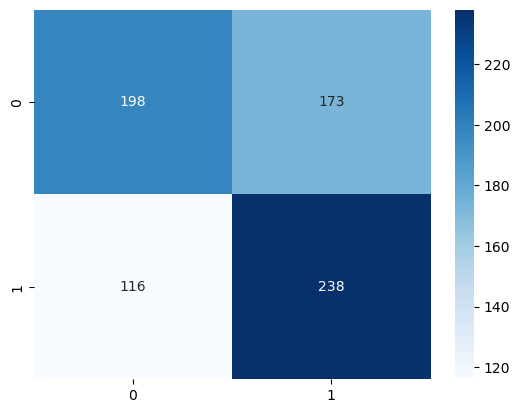

In [2618]:
# проверьте качество модели с помощью матрицы сопряжённостей
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

модель не переобучена, но тем не менее по матрице ошибок превалирует ошибка второго рода. Модель работает корректно, но ограничена дисбалансом выборки.